# Unsupervised ML (Clustering)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:

import pandas as pd

crime_data = pd.read_csv('03_District_wise_crimes_committed_against_children_2001_2012.csv')


In [3]:

crime_data.dropna(inplace=True)


In [4]:
crime_data 

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [5]:
crime_data.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total'],
      dtype='object')

In [6]:
# Select relevant columns for clustering (you can adjust this based on your analysis)
selected_columns = ['DISTRICT','Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act']
X = crime_data[selected_columns]



In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
lab_enc = LabelEncoder()

X['DISTRICT'] = lab_enc.fit_transform(X['DISTRICT'])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
C_num = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    C_num.append(kmeans.inertia_)

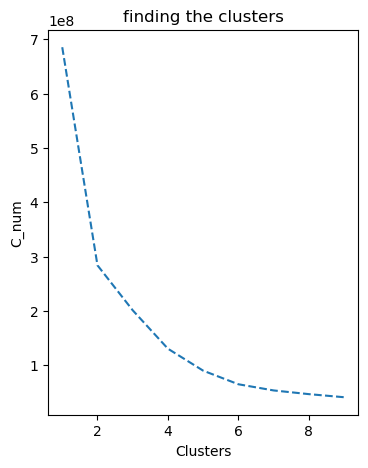

In [13]:
plt.figure(figsize=(4,5))
plt.plot(range(1, 10), C_num, linestyle='--')
plt.xlabel('Clusters')
plt.ylabel('C_num')
plt.title('finding the clusters')
plt.show()

In [14]:
n_clusters = 3

In [ ]:
'''have to choose 3 as per given task'''

In [15]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

In [17]:
crime_data ["Cluster"] = cluster_labels

In [19]:
cluster_dfs = []
for cluster_id in range(n_clusters):
    cluster_df = crime_data[crime_data["Cluster"] == cluster_id]
    cluster_dfs.append(cluster_df)

In [61]:
Sensitive_Area = cluster_dfs[0]
Moderate_Area = cluster_dfs[1]
Peaceful_Area = cluster_dfs[2]

In [60]:
Sensitive_Area

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total,Cluster
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66,0
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,DELHI,EAST,2012,4.0,40.0,467.0,0.0,0.0,17.0,3.0,1.0,1.0,0.0,1.0,534,0
8996,DELHI,EOW,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8997,DELHI,GRP(RLY),2012,3.0,4.0,25.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,2.0,45,0
8998,DELHI,IGI AIRPORT,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [62]:
Moderate_Area

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total,Cluster
10,ANDHRA PRADESH,KRISHNA,2001,1.0,11.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,18,1
11,ANDHRA PRADESH,KURNOOL,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
12,ANDHRA PRADESH,MAHABOOBNAGAR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
13,ANDHRA PRADESH,MEDAK,2001,1.0,18.0,12.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,34,1
14,ANDHRA PRADESH,NALGONDA,2001,0.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9008,DELHI,WEST,2012,3.0,46.0,427.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,60.0,542,1
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25,1


In [64]:
Peaceful_Area

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total,Cluster
5795,UTTAR PRADESH,TOTAL,2008,376.0,900.0,2224.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,576.0,4078,2
6561,UTTAR PRADESH,TOTAL,2009,372.0,625.0,1535.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553.0,3085,2
6628,DELHI,TOTAL,2009,74.0,307.0,2248.0,0.0,0.0,28.0,1.0,0.0,2.0,0.0,179.0,2839,2
7407,DELHI,TOTAL,2010,29.0,304.0,2982.0,7.0,0.0,45.0,0.0,0.0,4.0,0.0,259.0,3630,2
7540,BIHAR,TOTAL,2011,124.0,91.0,1821.0,1.0,0.0,1.0,183.0,1.0,1.0,0.0,10.0,2233,2
8130,UTTAR PRADESH,TOTAL,2011,326.0,1088.0,3739.0,12.0,5.0,0.0,0.0,1.0,4.0,4.0,321.0,5500,2
8198,DELHI,TOTAL,2011,39.0,339.0,3528.0,5.0,0.0,68.0,3.0,0.0,2.0,0.0,266.0,4250,2
8333,BIHAR,TOTAL,2012,129.0,137.0,2546.0,1.0,0.0,0.0,48.0,2.0,10.0,16.0,5.0,2894,2
8936,UTTAR PRADESH,TOTAL,2012,463.0,1040.0,4239.0,11.0,57.0,2.0,2.0,0.0,18.0,5.0,196.0,6033,2
9009,DELHI,TOTAL,2012,41.0,415.0,3686.0,2.0,0.0,68.0,3.0,1.0,4.0,1.0,241.0,4462,2


# 1. What is impacting more crimes in sensitive areas. 

In [69]:
Sensitive_Area.sum()

STATE/UT                             ANDHRA PRADESHANDHRA PRADESHANDHRA PRADESHANDH...
DISTRICT                             ADILABADANANTAPURCHITTOORCUDDAPAHEAST GODAVARI...
Year                                                                           8857220
Murder                                                                          8692.0
Rape                                                                           26888.0
Kidnapping and Abduction                                                       40818.0
Foeticide                                                                        707.0
Abetment of suicide                                                              198.0
Exposure and abandonment                                                        4586.0
Procuration of minor girls                                                      2114.0
Buying of girls for prostitution                                                 100.0
Selling of girls for prostitution          

In [ ]:
'''# Kidnapping and Abduction                                                       40818.0  

Kidnapping and Abduction     impacting more in Sensitive_Area'''

# 2. What needs to be done to reduce crime. 


In [70]:
'''more education awareness and understanding human rights society and government help, girls empowerment safty training
right low follow
follow all the rules
family education
socity awareness
police awareness
child right education
sex education will reduce more crime (rape)'''

'more education awareness and understanding human rights society and government help, girls empowerment safty training\nright low follow\nfollow all the rules\nfamily education\nsocity awareness\npolice awareness\nchild right education\nsex education will reduce more crime (rape)'

# 3 Most safe and unsafe districts.

In [72]:
Sensitive_Area.sort_values(ascending=False,by =['Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total',
       'Cluster'] )

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total,Cluster
2023,UTTAR PRADESH,ALIGARH,2003,49.0,8.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,100,0
1764,MADHYA PRADESH,INDORE,2003,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,0.0,14.0,75,0
2874,DELHI,DELHI UT TOTAL,2004,41.0,186.0,371.0,4.0,0.0,33.0,0.0,0.0,0.0,0.0,131.0,766,0
606,UTTAR PRADESH,GHAZIABAD,2001,35.0,9.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,86,0
3608,DELHI,DELHI UT TOTAL,2005,34.0,235.0,507.0,3.0,0.0,47.0,0.0,9.0,0.0,0.0,191.0,1026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,WEST BENGAL,KHARAGPUR G.R.P.,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8992,DELHI,CAW,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8994,DELHI,CRIME BRANCH,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8996,DELHI,EOW,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
'''join all the given dfs i made one df '''

In [75]:
dfs = pd.read_csv('capstonf')

In [76]:
dfs 

,STATE/UT,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,total_crime
0,uttar pradesh,199812341.0,0.2023,240928.0,829.0,912.0,67.68,108.0,154.0,0.0,...,279500.0,47648.0,59396.0,53022.0,155234.0,6.0,227642.0,1253898.0,3716148.0,8.004852e+10
1,maharashtra,112374333.0,0.1599,307713.0,365.0,929.0,82.34,90.0,78.0,0.0,...,707520.0,8498.0,78438.0,24220.0,160726.0,4.0,269226.0,1120120.0,4546872.0,3.611712e+11
2,bihar,104099452.0,0.2542,94163.0,1106.0,918.0,61.80,52.0,26.0,16.0,...,378532.0,27096.0,15152.0,452.0,51360.0,880.0,88884.0,1077182.0,2692586.0,2.221076e+10
3,west bengal,91276115.0,0.1384,88752.0,1028.0,950.0,76.26,28.0,16.0,0.0,...,188304.0,10344.0,45742.0,3108.0,261336.0,228.0,75502.0,852388.0,2238608.0,6.206527e+10
4,andhra pradesh,84580777.0,0.1098,275045.0,308.0,993.0,67.02,226.0,110.0,4.0,...,1093130.0,12430.0,103998.0,72262.0,238014.0,34.0,276870.0,964504.0,4037962.0,5.802190e+10
5,madhya pradesh,72626809.0,0.2035,308252.0,236.0,931.0,69.32,16.0,14.0,6.0,...,825154.0,18072.0,159756.0,18634.0,79938.0,120.0,129938.0,2393164.0,4827540.0,9.397421e+10
6,tamil nadu,72147030.0,0.1561,130060.0,555.0,996.0,80.09,22.0,18.0,0.0,...,561346.0,4634.0,38658.0,20086.0,36376.0,30.0,280386.0,2372230.0,4120352.0,4.560412e+10
7,rajasthan,68548437.0,0.2131,342239.0,200.0,928.0,66.11,16.0,8.0,0.0,...,534706.0,10132.0,61706.0,708.0,200202.0,12.0,156700.0,1569982.0,3711832.0,6.878245e+10
8,karnataka,61095297.0,0.1560,191791.0,319.0,973.0,75.36,74.0,18.0,0.0,...,502664.0,5836.0,47398.0,1662.0,60104.0,94.0,10156.0,1362672.0,2962126.0,7.579084e+10
9,gujarat,60439692.0,0.1928,196244.0,308.0,919.0,78.03,226.0,166.0,0.0,...,270436.0,1004.0,17996.0,2730.0,118862.0,0.0,108770.0,1459368.0,2771550.0,1.168329e+11


In [78]:
dfs1 = dfs.iloc [:,[0,-1]]

In [79]:
dfs1

,STATE/UT,total_crime
0,uttar pradesh,8.004852e+10
1,maharashtra,3.611712e+11
2,bihar,2.221076e+10
3,west bengal,6.206527e+10
4,andhra pradesh,5.802190e+10
5,madhya pradesh,9.397421e+10
6,tamil nadu,4.560412e+10
7,rajasthan,6.878245e+10
8,karnataka,7.579084e+10
9,gujarat,1.168329e+11


In [80]:
sorted_df = dfs1.sort_values(by=dfs1.columns[1], ascending=False)


In [81]:
sorted_df

,STATE/UT,total_crime
1,maharashtra,3.611712e+11
9,gujarat,1.168329e+11
5,madhya pradesh,9.397421e+10
17,delhi,8.284666e+10
0,uttar pradesh,8.004852e+10
8,karnataka,7.579084e+10
7,rajasthan,6.878245e+10
3,west bengal,6.206527e+10
4,andhra pradesh,5.802190e+10
16,haryana,5.184901e+10


In [82]:
'''most unsafe places are 
STATE/UT	total_crime
1	maharashtra	3.611712e+11
9	gujarat	1.168329e+11
5	madhya pradesh	9.397421e+10
17	delhi	8.284666e+10
0	uttar pradesh	8.004852e+10

from which on top is maharashtra with 3.611712e+11 cases (unsafe state)

most safe places are 
23	manipur	2.569400e+09
27	puducherry	1.494253e+09
21	tripura	1.493742e+09
30	sikkim	7.591636e+08
34	lakshadweep	2.075990e+07

from which on top lakshadweep with 2.075990e+07 cases (safe state)'''

'most unsafe places are \nSTATE/UT\ttotal_crime\n1\tmaharashtra\t3.611712e+11\n9\tgujarat\t1.168329e+11\n5\tmadhya pradesh\t9.397421e+10\n17\tdelhi\t8.284666e+10\n0\tuttar pradesh\t8.004852e+10\n\nfrom which on top is maharashtra with 3.611712e+11 cases (unsafe state)\n\nmost safe places are \n23\tmanipur\t2.569400e+09\n27\tpuducherry\t1.494253e+09\n21\ttripura\t1.493742e+09\n30\tsikkim\t7.591636e+08\n34\tlakshadweep\t2.075990e+07\n\nfrom which on top lakshadweep with 2.075990e+07 cases (safe state)'

#  Etc.......Anything that you observe

In [ ]:
''' It's about the crime have happened in the given time period and to analyze the route cause of the crime
From what I understand overall from the project if you are in a state or country which is educated you do not need to worry about crime
because education makes a good place to live and a better environment.